**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 4c | PCA and Image Compression

In [20]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [7,7]})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Preparing the Image

### 1a. Import and view an image

1. Import `lorikeet.png` using pyplot's [imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)
2. Print the shape of the image. *NOTE: The 4th color channel corresponds to the image's [alpha channel](https://en.wikipedia.org/wiki/Alpha_channel)*.
3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). Remove the grid lines using [plt.grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html).
4. Show the pyplot


(678, 907, 4)


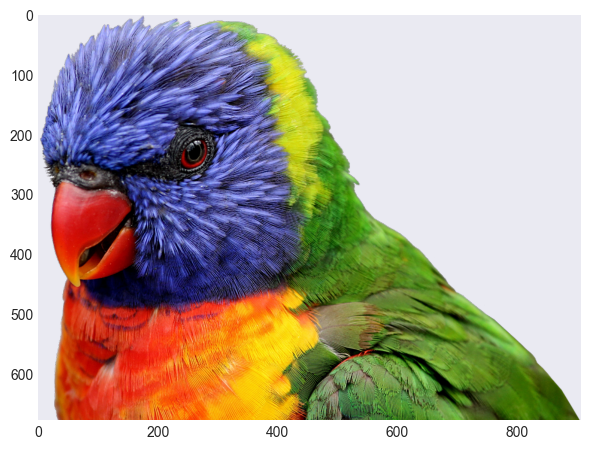

In [21]:
# 1. Import the image
image = plt.imread('img/lorikeet.png')

# 2. Print the shape of the image
print(image.shape)

# 3. Display the image
plt.imshow(image)
plt.grid(False)

# 4. Show the pyplot
plt.show()

### 1b. Reshape and compute original variable means

1. Reshape your image for compression
    1. Reshape your 3 dimensional `(R, C, n_chans)` array to be a 2 dimensional `(R, C*n_chans)` array and assign it to a new variable (`color_flat`).
    2. Print out the shape of `color_flat`.
2. Calculate the [means](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) of each variable in  `color_flat` (columns) and assign it to a new variable. Your means should have the shape `(C*n_chans,)`

In [22]:
# 1. Reshape the image
print(image.shape)
color_flat = image.reshape(image.shape[0], -1)
print(color_flat.shape)

# 2. Calculate the means
orig_var_means = np.mean(color_flat, axis=0)

(678, 907, 4)
(678, 3628)


## Task 2:  Compressing the Image

### Find the Image's Principal Components

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to extract the image's eigenvectors and the principal components
1. Create an instance of the PCA class with 400 components
2. Call the method `fit_transform` with `color_flat` as the X parameter and saving the results into a new variable representing the Transformed values.
3. Print the shape of the Transformed values and the PCA's components.  The Transformed values should have the shape `(R, 400)` and the PCA's components should have the shape `(400, C*n_chans)`
4. Create an elbow plot of the [cumulative sum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) of the [PCA's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) explained variance ratio.
    1. The x axis should be `# of Principal Components`
    1. The y axis should be `Proportional Variance Accounted for`
    1. Include a title, and x and y axis labels.

(678, 400)
(400, 3628)


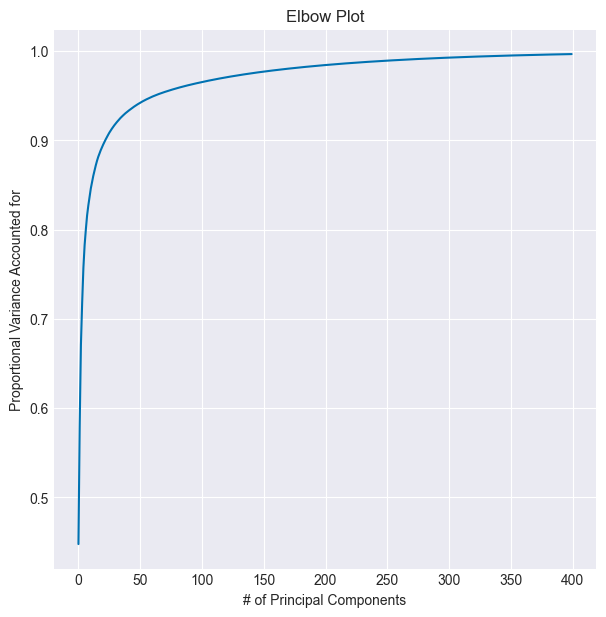

In [23]:
from sklearn.decomposition import PCA

# 1. Create an instance of the PCA class
pca = PCA(n_components=400)

# 2. Call the method fit_transform
transformed_values = pca.fit_transform(color_flat)

# 3. Print the shape of the Transformed values and the PCA's components
print(transformed_values.shape)
print(pca.components_.shape)

# 4. Create an elbow plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of Principal Components')
plt.ylabel('Proportional Variance Accounted for')
plt.title('Elbow Plot')
plt.show()


## Task 3: Reconstruct the Image 

### Reconstruct the image accounting for 90-91% percent of the proportional variance

1. Using the elbow plot, determine a number of principal components which account for roughly 90-91% percent of the proportional variance in the image.
1. Compute the inverse transform:
    1. `transformed_values @ principal_components + orig_var_means`
    2. With shapes `(R, k) @ (k, C*n_chans) + (C*n_chans,)`
    3. With `k` equal to the number of principal components you are keeping
3. Show the reconstructed image
    1. Use numpy's [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) method to clip any values less than 0 or greater than 1 in the reconstructed image.
    2. Reshape the reconstructed image back to the shape of the original image
    3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    4. Show the pyplot
2. Compute the compression ratio of this image
    1. Uncompressed size =  the number of floats in the original image `R*C*n_chans`
    2. Compressed size = the number of floats required to compute the inverse transform `R*k + k*C*n_chans + C*n_chans`
    3. Compression ratio = Compressed size / Uncompressed size

22


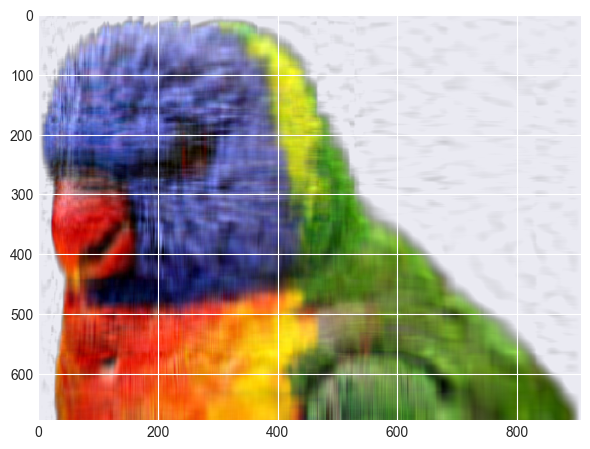

0.0399872509130883


In [25]:
# 1. Determine the number of principal components
k = 0
for i in range(400):
    if np.cumsum(pca.explained_variance_ratio_)[i] > 0.9:
        k = i
        break

# 2. Compute the inverse transform
reconstructed_image = transformed_values[:, :k] @ pca.components_[:k] + orig_var_means

# 3. Show the reconstructed image
reconstructed_image = np.clip(reconstructed_image, 0, 1)
reconstructed_image = reconstructed_image.reshape(image.shape)
plt.imshow(reconstructed_image)
plt.show()

# 4. Compute the compression ratio
uncompressed_size = image.size
compressed_size = color_flat.shape[0]*k + (k+1)*color_flat.shape[1]
compression_ratio = compressed_size / uncompressed_size
print(compression_ratio)


## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.